# <center>Aprendizaje Automatico</center>
### <center>Valor Cryptomonedas (Bitcoin) TP: Grupo N°14 </center>

### <center>Integrantes:</center>
## <center>Lisandro Roman</center>
## <center>Estefano Polizzi</center>

#### Trabajamos con Bitcoin una cryptomoneda con mucha historia y cantidad de información.

## Importamos librerias y abrimos dataset

In [12]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class


#modelos y métricas
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

#Metricas para evaluar modelos
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

#Modelos Support Vector Machine, Random Forest, XGBoost, LSTM (Long Short-Term Memory)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#Importamos datasets
data_btc = pd.read_csv('./datasets/BTC.csv')

## Preprocesamiento del dataset

Shape of your Data Set loaded: (5242, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    6 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['date', 'ticker']
To fix these data quality issues in the dataset, im

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
ticker,object,0.000000,0,,,Possible Zero-variance or low information colum: drop before modeling step.
date,object,0.000000,100,,,Possible ID column: drop before modeling step.
open,float64,0.000000,NA,0.049510,94225.500000,Column has 429 outliers greater than upper bound (49837.67) or lower than lower bound(-29525.99). Cap them or remove them.
high,float64,0.000000,NA,0.049510,99048.200000,"Column has 436 outliers greater than upper bound (50845.71) or lower than lower bound(-30124.66). Cap them or remove them., Column has a high correlation with ['open']. Consider dropping one of them."
low,float64,0.000000,NA,0.010000,93840.400000,"Column has 419 outliers greater than upper bound (48691.16) or lower than lower bound(-28844.61). Cap them or remove them., Column has a high correlation with ['open', 'high']. Consider dropping one of them."
close,float64,0.000000,NA,0.049510,98446.500000,"Column has 429 outliers greater than upper bound (49901.64) or lower than lower bound(-29564.26). Cap them or remove them., Column has a high correlation with ['open', 'high', 'low']. Consider dropping one of them."


Number of All Scatter Plots = 10


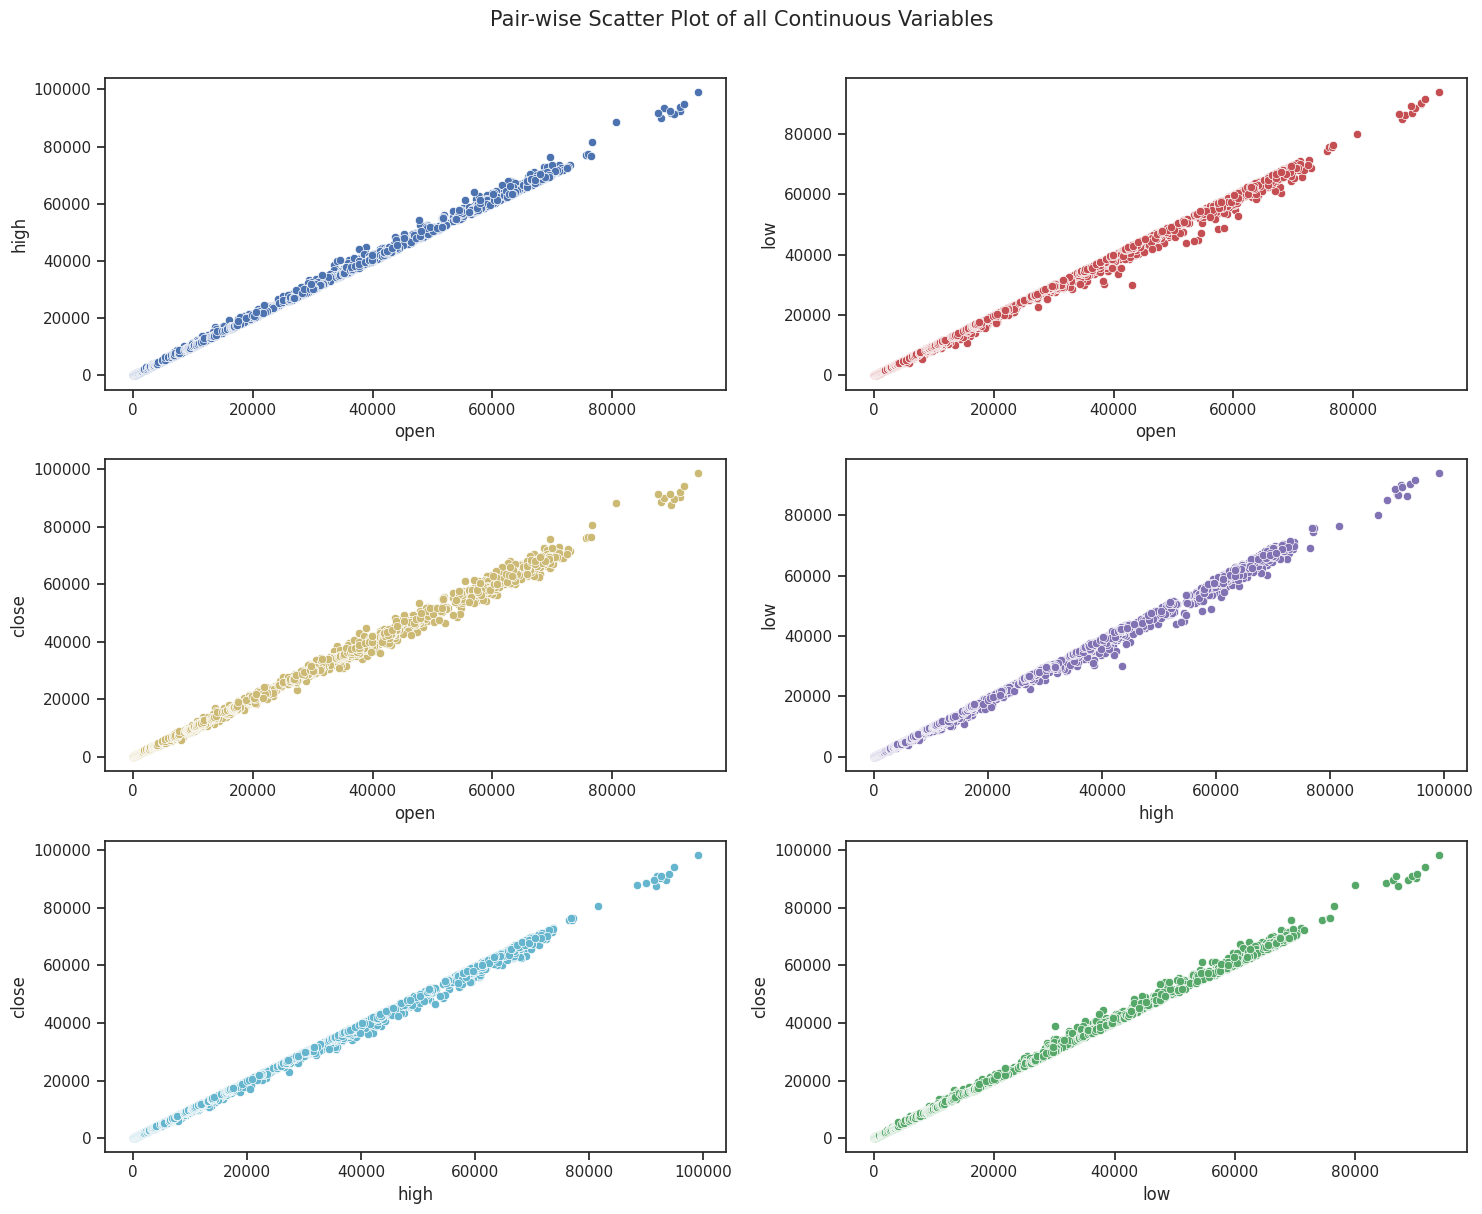

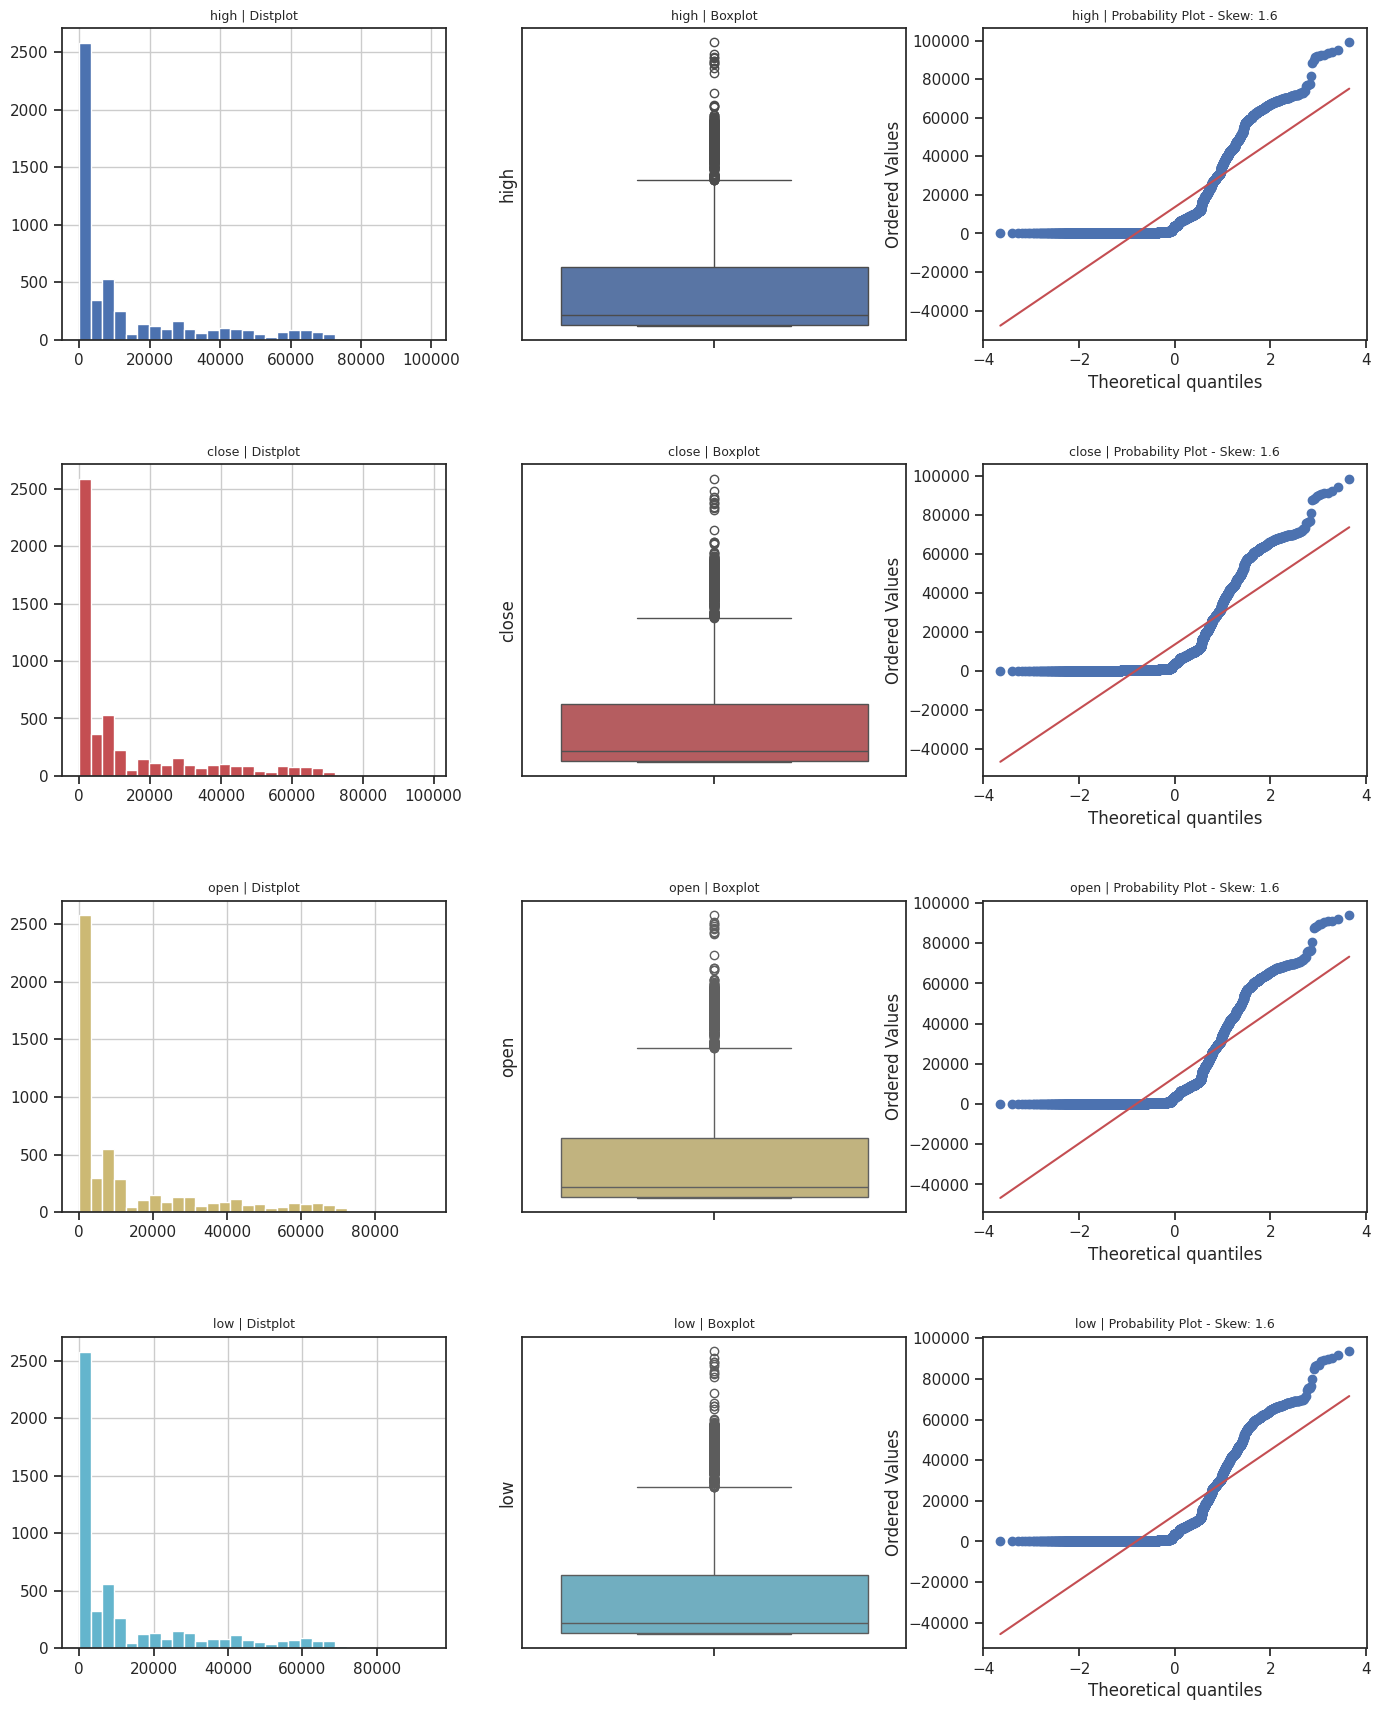

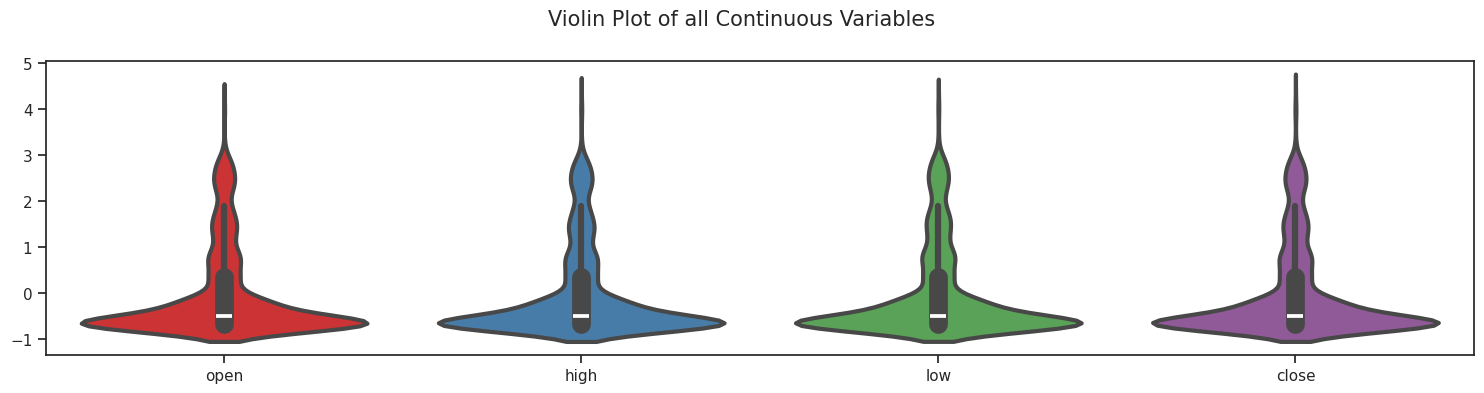

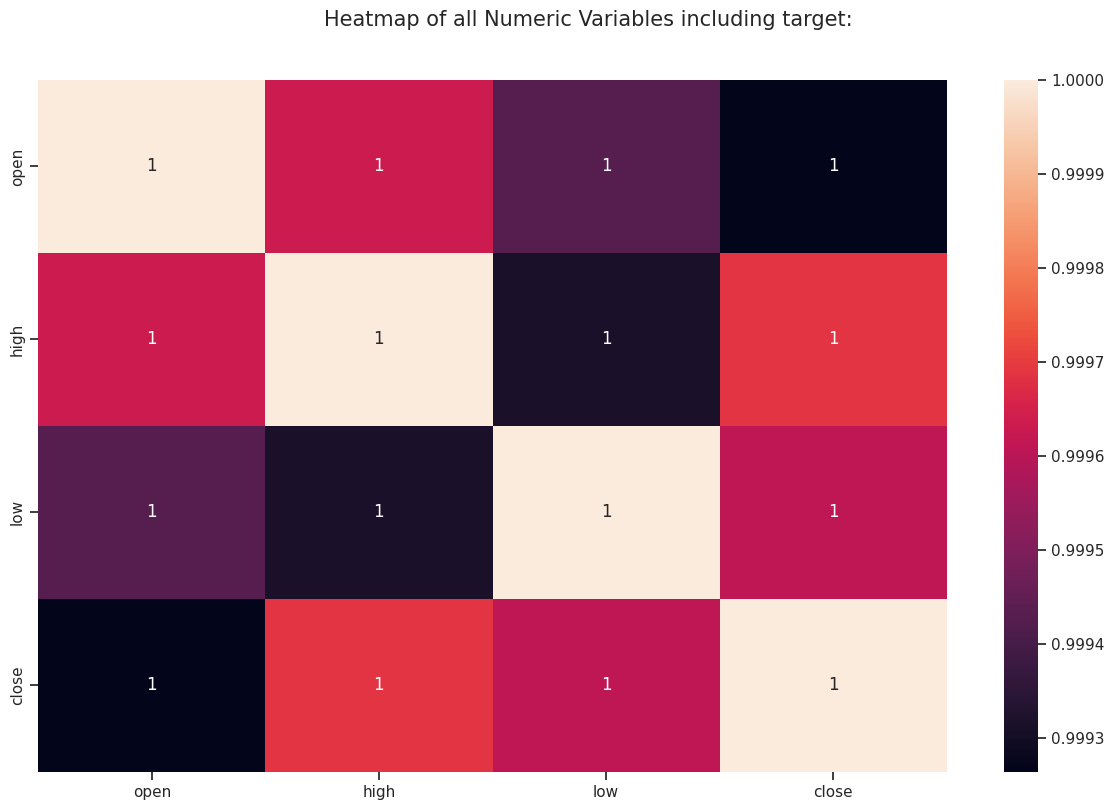

All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921
...,...,...,...,...,...,...
5237,BTC,2024-11-17,90360.00000,91438.10000,88722.00000,89567.60000
5238,BTC,2024-11-18,89559.60000,92601.60000,89336.60000,91230.00000
5239,BTC,2024-11-19,91230.00000,94015.00000,90298.30000,91941.90000
5240,BTC,2024-11-20,91926.30000,94904.00000,91630.90000,94225.50000


In [21]:
#Observamos los tipos de dato con AutoViz
AV = AutoViz_Class()

%matplotlib inline
AV.AutoViz('./datasets/BTC.csv')

Agregamos la media

In [14]:
def agregar_media(df):
    df['mean_day'] = df[['open', 'high', 'low', 'close']].mean(axis=1)
    return df

data_btc = agregar_media(data_btc)

data_btc.head()

,ticker,date,open,high,low,close,mean_day
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,0.049510
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,0.067678
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0.084235
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,0.077902
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,0.074875


Agregamos target binario según valor la media del dia anterior y siguiente para saber si sube o baja su valor al proximo dia

In [23]:
# Convertir la fecha a formato datetime por si hace falta
data_btc['date'] = pd.to_datetime(data_btc['date'])

# Calcular el target basado en la media del día anterior
data_btc['target'] = (data_btc['mean_day'] > data_btc['mean_day'].shift(1)).astype(int)

data_btc.head(20)

,ticker,date,open,high,low,close,mean_day,target
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,0.049510,0
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,0.067678,1
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0.084235,1
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,0.077902,0
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,0.074875,0
5,BTC,2010-07-22,0.07921,0.08181,0.05050,0.05050,0.065505,0
6,BTC,2010-07-23,0.05050,0.06767,0.05050,0.06262,0.057822,0
7,BTC,2010-07-24,0.06262,0.06262,0.05049,0.05454,0.057568,0
8,BTC,2010-07-25,0.05454,0.05941,0.05050,0.05050,0.053737,0
9,BTC,2010-07-26,0.05050,0.05600,0.05000,0.05600,0.053125,0


Agregamos una columna que represente la variación porcentual diaria

In [24]:
data_btc['daily_variation'] = (data_btc['high'] - data_btc['low']) / data_btc['mean_day']

# Clasificamos la variación diaria
threshold = 0.1  # 10% de umbral, si varia mas del umbral es 1 porque hay alta variacion, 0 sino
data_btc['variation_category'] = data_btc['daily_variation'].apply(
    lambda x: 1 if x > threshold else 0
)

In [25]:
data_btc.head()

,ticker,date,open,high,low,close,mean_day,target,daily_variation,variation_category
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,0.049510,0,0.000000,0
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,0.067678,1,0.536958,1
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0.084235,1,0.188045,1
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,0.077902,0,0.096916,0
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,0.074875,0,0.171886,1


Borramos ticker al ser una variable categorica, que solo aporta el nombre de la cryptomoneda

In [26]:
# Eliminamos ticker
data_btc = data_btc.drop(columns=['ticker'])

In [27]:
data_btc.head()

,date,open,high,low,close,mean_day,target,daily_variation,variation_category
0,2010-07-17,0.04951,0.04951,0.04951,0.04951,0.049510,0,0.000000,0
1,2010-07-18,0.04951,0.08585,0.04951,0.08584,0.067678,1,0.536958,1
2,2010-07-19,0.08584,0.09307,0.07723,0.08080,0.084235,1,0.188045,1
3,2010-07-20,0.08080,0.08181,0.07426,0.07474,0.077902,0,0.096916,0
4,2010-07-21,0.07474,0.07921,0.06634,0.07921,0.074875,0,0.171886,1


Convertimos las fechas

In [28]:
data_btc['day_of_week'] = pd.to_datetime(data_btc['date']).dt.dayofweek
data_btc['month'] = pd.to_datetime(data_btc['date']).dt.month
data_btc['year'] = pd.to_datetime(data_btc['date']).dt.year

data_btc = data_btc.drop(columns=['date'])

data_btc.head(20)

,open,high,low,close,mean_day,target,daily_variation,variation_category,day_of_week,month,year
0,0.04951,0.04951,0.04951,0.04951,0.049510,0,0.000000,0,5,7,2010
1,0.04951,0.08585,0.04951,0.08584,0.067678,1,0.536958,1,6,7,2010
2,0.08584,0.09307,0.07723,0.08080,0.084235,1,0.188045,1,0,7,2010
3,0.08080,0.08181,0.07426,0.07474,0.077902,0,0.096916,0,1,7,2010
4,0.07474,0.07921,0.06634,0.07921,0.074875,0,0.171886,1,2,7,2010
5,0.07921,0.08181,0.05050,0.05050,0.065505,0,0.477979,1,3,7,2010
6,0.05050,0.06767,0.05050,0.06262,0.057822,0,0.296943,1,4,7,2010
7,0.06262,0.06262,0.05049,0.05454,0.057568,0,0.210709,1,5,7,2010
8,0.05454,0.05941,0.05050,0.05050,0.053737,0,0.165806,1,6,7,2010
9,0.05050,0.05600,0.05000,0.05600,0.053125,0,0.112941,1,0,7,2010


Verificamos existencia de valores nulos

In [29]:
# Revisar valores nulos
print("Valores nulos en BTC:")
print(data_btc.isnull().sum())

# Eliminar filas o imputar valores si hay valores nulos
data_btc = data_btc.dropna()

Valores nulos en BTC:
open                  0
high                  0
low                   0
close                 0
mean_day              0
target                0
daily_variation       0
variation_category    0
day_of_week           0
month                 0
year                  0
dtype: int64


## Dividimos los datasets para entrenar y testear

In [30]:
# Seleccionar características y target
X_btc = data_btc.drop(columns=['target']) 
y_btc = data_btc['target']                        

# Modelos

### Random Forest

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X_btc,
                                                    y_btc,
                                                    test_size=0.2,  
                                                    random_state=70)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
rf_predictions = rf_model.predict(x_test)
ds_resultados=pd.DataFrame(zip(y_test, rf_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, rf_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, rf_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, rf_predictions)
print("F1-Score:", f1)

Accuracy: 0.6272640610104862
Precisión: 0.6407766990291263
Recall: 0.7008849557522124
F1-Score: 0.6694843617920542


Mejora de hiperparametros

In [34]:
param_grid = {
    'n_estimators':[550,551,555],
    'bootstrap':[True], 
    'max_depth':[20,25,28],
    'max_features':[20,22,25], 
    'min_samples_split':[2,3,4], 
    'min_samples_leaf':[1,2,3], 
    'random_state':[65,71,75]
}

# Crear el clasificador SVM
svm_classifier = RandomForestClassifier()

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = RandomizedSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar el mejor puntaje
print("Mejor puntaje de validación cruzada:", grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'random_state': 71, 'n_estimators': 555, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 22, 'max_depth': 25, 'bootstrap': True}
Mejor puntaje de validación cruzada: 0.6238976392511827


Probamos modelo con mejores hiperparametros

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X_btc,
                                                    y_btc,
                                                    test_size=0.2,  
                                                    random_state=71)

rf_model = RandomForestClassifier(n_estimators=110,
                                  bootstrap=True, 
                                  max_depth=28,
                                  max_features=22, 
                                  min_samples_split=2, 
                                  min_samples_leaf=1, 
                                  random_state=71)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=28, max_features=22, n_estimators=110,
                       random_state=71)

In [95]:
rf_predictions = rf_model.predict(x_test)
ds_resultados=pd.DataFrame(zip(y_test, rf_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, rf_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, rf_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, rf_predictions)
print("F1-Score:", f1)

Accuracy: 0.6015252621544328
Precisión: 0.627831715210356
Recall: 0.6736111111111112
F1-Score: 0.6499162479061977


Matriz de confusion

Text(17.450000000000003, 0.5, 'True')

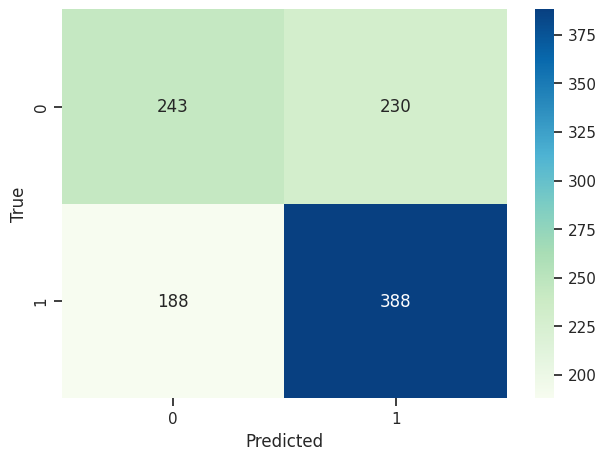

In [96]:
tabla=confusion_matrix(y_test, rf_predictions)

%matplotlib inline
#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

### Support Vector Machine

In [ ]:
svm_classifier = SVC(kernel='linear',
                    C=0.1,
                    gamma='scale',
                    degree=3,
                    class_weight=None)

svm_classifier.fit(x_train, y_train)

svm_predictions = svm_classifier.predict(np.array(x_test))
ds_resultados=pd.DataFrame(zip(y_test,svm_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, svm_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, svm_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, svm_predictions)
print("F1-Score:", f1)

Accuracy: 0.7178265014299333
Precisión: 0.6940836940836941
Recall: 0.8513274336283185
F1-Score: 0.7647058823529411


Buscamos mejores hiperparametros

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 15, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0, 1],
    'class_weight': [None, 'balanced']
}

# Crear el clasificador SVM
svm_classifier = SVC()

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = RandomizedSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar el mejor puntaje
print("Mejor puntaje de validación cruzada:", grid_search.best_score_)

Probamos mejores hiperparametros

In [ ]:
svm_classifier = SVC(kernel='linear',
                    C=10,
                    gamma="auto",
                    degree=2,
                    coef0=0,
                    class_weight= None
                    )


svm_classifier.fit(x_train, y_train)

SVC(C=10, coef0=0, degree=2, gamma='auto', kernel='linear')

In [ ]:
svm_predictions = svm_classifier.predict(np.array(x_test))
ds_resultados=pd.DataFrame(zip(y_test,svm_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, svm_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, svm_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, svm_predictions)
print("F1-Score:", f1)

Accuracy: 0.7254528122020972
Precisión: 0.7120980091883614
Recall: 0.8230088495575221
F1-Score: 0.7635467980295565


Matriz de confusion

In [ ]:
tabla=confusion_matrix(y_test, svm_predictions)

%matplotlib inline
#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(12.444444444444445, 0.5, 'True')

### XGBoost

In [ ]:
xgb_model = XGBClassifier(n_estimators=100)

xgb_model.fit(x_train, y_train)

xgb_predictions = xgb_model.predict(np.array(x_test))
ds_resultados=pd.DataFrame(zip(y_test, xgb_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, xgb_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, xgb_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, xgb_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, xgb_predictions)
print("F1-Score:", f1)

Accuracy: 0.6663489037178265
Precisión: 0.6731078904991948
Recall: 0.7398230088495575
F1-Score: 0.7048903878583473


Mejora de hiperparametros

In [ ]:
n=10

params_grid = {'n_estimators':[300, 500, 700, 1000],
                'max_depth':list(range(0,30)),
                'learning_rate':[1, 0.1, 0.01],
                'subsample':1,
                'colsample_bytree':[1, 0.8, 0.5],
                'gamma':[0.8, 0.5, 0.3],
                'objective':"reg:logistic",
                'random_state':30}

folds=10
kfoldcv = StratifiedKFold(n_splits=folds)
base_tree = XGBClassifier()
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

randomcv.fit(x_train,y_train)

#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

Probamos mejores hiperparametros

In [ ]:
xgb_model = XGBClassifier(n_estimators=1000,
                          max_depth=25,
                          learning_rate=0.01,
                          subsample=1,
                          colsample_bytree=0.8,
                          gamma=0.3,
                          objective="reg:logistic",
                          random_state=30)

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=25, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='reg:logistic',
              predictor='auto', random_state=30, reg_alpha=0, ...)

In [ ]:
xgb_predictions = xgb_model.predict(np.array(x_test))
ds_resultados=pd.DataFrame(zip(y_test, xgb_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, xgb_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, xgb_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, xgb_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, xgb_predictions)
print("F1-Score:", f1)

Accuracy: 0.6644423260247855
Precisión: 0.6709470304975923
Recall: 0.7398230088495575
F1-Score: 0.7037037037037037


Graficamos la tabla de confusion

In [ ]:
tabla=confusion_matrix(y_test, xgb_predictions)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(12.444444444444445, 0.5, 'True')

### LSTM

In [ ]:
#Volvemos a crear los datos de entrenamiento para modificarlos en secuencias para la red neuronal
x_train, x_test, y_train, y_test = train_test_split(X_btc,
                                                    y_btc,
                                                    test_size=0.2,  
                                                    random_state=70)

In [ ]:
#Creamos las secuencias para el modelo
window_size = 5  # Ventana de tiempo de una semana

def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i + window_size])
    return np.array(sequences)

x_train_seq = create_sequences(x_train, window_size)
y_train_seq = y_train[window_size:]

print(f"Dimensiones de y_train_seq: {y_train_seq.shape}")
print(f"Dimensiones de x_train_seq: {x_train_seq.shape}")


Dimensiones de y_train_seq: (4188,)
Dimensiones de x_train_seq: (4188, 5, 10)


In [ ]:
x_test_seq = create_sequences(x_test, window_size)
y_test_seq = y_test[window_size:]

print(f"Dimensiones de y_train_seq: {y_test_seq.shape}")
print(f"Dimensiones de x_train_seq: {x_test_seq.shape}")

Dimensiones de y_train_seq: (1044,)
Dimensiones de x_train_seq: (1044, 5, 10)


In [ ]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(x_train_seq.shape[1], x_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train_seq, y_train_seq,
    epochs=50,
    batch_size=16,
    validation_split=0.3,
    verbose=1
)


Epoch 1/50
184/184 [==============================] - 4s 8ms/step - loss: 0.6948 - accuracy: 0.5148 - val_loss: 0.6869 - val_accuracy: 0.5561
Epoch 2/50
184/184 [==============================] - 1s 5ms/step - loss: 0.6926 - accuracy: 0.5360 - val_loss: 0.6876 - val_accuracy: 0.5561
Epoch 3/50
184/184 [==============================] - 1s 5ms/step - loss: 0.6914 - accuracy: 0.5418 - val_loss: 0.6879 - val_accuracy: 0.5561
Epoch 4/50
184/184 [==============================] - 1s 5ms/step - loss: 0.6911 - accuracy: 0.5374 - val_loss: 0.6880 - val_accuracy: 0.5561
Epoch 5/50
184/184 [==============================] - 1s 5ms/step - loss: 0.6900 - accuracy: 0.5435 - val_loss: 0.6892 - val_accuracy: 0.5545
Epoch 6/50
184/184 [==============================] - 1s 5ms/step - loss: 0.6906 - accuracy: 0.5428 - val_loss: 0.6883 - val_accuracy: 0.5561
Epoch 7/50
184/184 [==============================] - 1s 5ms/step - loss: 0.6907 - accuracy: 0.5397 - val_loss: 0.6895 - val_accuracy: 0.5561
Epoch 

In [ ]:
predicciones = model.predict(x_test_seq)

umbral = 0.5
predicciones = [1 if p > umbral else 0 for p in predicciones]

accuracy = accuracy_score(y_test_seq, predicciones)
precision = precision_score(y_test_seq, predicciones)
recall = recall_score(y_test_seq, predicciones)
f1 = f1_score(y_test_seq, predicciones)

print("Accuracy:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

33/33 [==============================] - 0s 2ms/step
Accuracy: 0.5325670498084292
Precisión: 0.5351976856316297
Recall: 0.9893048128342246
F1-Score: 0.6946182728410512


In [ ]:
# Gráfico de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.show()

# Gráfico de precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.legend()
plt.show()


# Guardamos el mejor modelo para predecir

In [ ]:
svm_classifier.save('modelo_criptomonedas.h5')